In [1]:
import pandas as pd
import numpy as np

In [2]:
new_file = 'IDMC_GIDD_Disasters_Internal_Displacement_Data.xlsx'
csv_converted = 'innerDisplaced.csv'
df = pd.read_excel(new_file)
df.to_csv(csv_converted, index=False)
df_innerDisplaced = pd.read_csv('innerDisplaced.csv')
df_innerDisplaced.head(10)
df_innerDisplaced.tail(10)

,ISO3,Country / Territory,Year,Event Name,Date of Event (start),Disaster Internal Displacements,Disaster Internal Displacements (Raw),Hazard Category,Hazard Type,Hazard Sub Type,Event Codes (Code:Type),Event ID,Displacement occurred
17029,DNK,Denmark,2023,"Denmark ,Germany, Ireland, United Kingdom: Sto...",2023-10-18,71,71,Weather related,Storm,Storm,NaN,22205.0,Displacement without preventive evacuations re...
17030,DEU,Germany,2023,"Denmark ,Germany, Ireland, United Kingdom: Sto...",2023-10-18,2000,2000,Weather related,Storm,Storm,NaN,22205.0,Displacement without preventive evacuations re...
17031,IRL,Ireland,2023,"Denmark ,Germany, Ireland, United Kingdom: Sto...",2023-10-18,7,7,Weather related,Storm,Storm,NaN,22205.0,Displacement without preventive evacuations re...
17032,GBR,United Kingdom,2023,"Denmark ,Germany, Ireland, United Kingdom: Sto...",2023-10-18,4100,4098,Weather related,Storm,Storm,NaN,22205.0,Displacement reporting preventive evacuations
17033,FRA,France,2023,"France, Spain, Portugal: Storm Aline - 17/10/2023",2023-10-17,330,326,Weather related,Storm,Storm,NaN,22206.0,Displacement reporting preventive evacuations
17034,PRT,Portugal,2023,"France, Spain, Portugal: Storm Aline - 17/10/2023",2023-10-17,14,14,Weather related,Storm,Storm,NaN,22206.0,Displacement without preventive evacuations re...
17035,USA,United States,2023,"Mexico, United States: Tropical Cyclone Hilary...",2023-08-16,9000,9000,Weather related,Storm,Typhoon/Hurricane/Cyclone,TC-2023-000150-MEX:Glide Number; TC-2023-00015...,22210.0,Displacement without preventive evacuations re...
17036,CUB,Cuba,2023,"Cuba, United States: Tropical Cyclone Idalia -...",2023-08-26,13000,13044,Weather related,Storm,Typhoon/Hurricane/Cyclone,NaN,22212.0,Displacement without preventive evacuations re...
17037,USA,United States,2023,"Cuba, United States: Tropical Cyclone Idalia -...",2023-08-26,57000,57483,Weather related,Storm,Typhoon/Hurricane/Cyclone,NaN,22212.0,Displacement reporting preventive evacuations
17038,PHL,Philippines,2023,Philippines: Erosion - Region V (Legazpi) - 27...,2023-12-27,50,50,Weather related,Erosion,Erosion,NaN,22214.0,Displacement reporting preventive evacuations


In [3]:
df_innerDisplaced['Year'].value_counts()
df_innerDisplaced[['Year', 'Disaster Internal Displacements']].groupby(by="Year").sum().sort_values(by="Disaster Internal Displacements",ascending=False)

,Disaster Internal Displacements
Year,
2010,42352645
2008,38239503
2022,32564766
2020,30986437
2012,30146782
2023,26396066
2019,25248362
2016,24417499
2021,23719664


In [4]:
df_innerDisplaced[['Year', 'Disaster Internal Displacements', 'Hazard Category']].groupby(by=["Year", "Hazard Category"]).sum().sort_values(by="Disaster Internal Displacements", ascending=False)

,,Disaster Internal Displacements
Year,Hazard Category,
2010,Weather related,38302395
2022,Weather related,31847774
2020,Weather related,30332687
2012,Weather related,29469442
2019,Weather related,24300050
2016,Weather related,23808867
2008,Weather related,22470123
2021,Weather related,22356222
2013,Weather related,20300462


In [5]:
#df_innerDisplaced['Country / Territory'].value_counts().sort_values(ascending=False).head(10)
df_innerDisplaced.rename(columns={'Country / Territory': 'hazard-location'}, inplace=True)
df_innerDisplaced['hazard-location'].value_counts().sort_values(ascending=False).head(10)

hazard-location
Indonesia        2149
United States    1233
Colombia          826
Peru              708
Brazil            640
Philippines       634
China             604
Malaysia          589
Sri Lanka         435
Burundi           400
Name: count, dtype: int64

In [6]:
sub_type = df_innerDisplaced[ 'Hazard Sub Type' ].value_counts().sort_values( ascending = False ).head(10)
print (sub_type)

Hazard Sub Type
Flood                          7673
Storm                          3459
Landslide/Wet mass movement    1586
Wildfire                       1523
Typhoon/Hurricane/Cyclone       632
Earthquake                      518
Tornado                         509
Drought                         259
Dry mass movement               180
Hailstorm                       163
Name: count, dtype: int64


In [7]:
type = df_innerDisplaced[ 'Hazard Type' ].value_counts().sort_values( ascending = False ).head(10)
print(type)

Hazard Type
Flood                  7704
Storm                  4874
Mass Movement          1824
Wildfire               1523
Earthquake              522
Drought                 259
Extreme Temperature     135
Volcanic activity       114
Erosion                  63
Wave action              21
Name: count, dtype: int64


In [8]:
df_innerDisplaced[['hazard-location','Year','Hazard Type','Hazard Sub Type','Disaster Internal Displacements']].sort_values(by='Disaster Internal Displacements',ascending=False).head(20)

,hazard-location,Year,Hazard Type,Hazard Sub Type,Disaster Internal Displacements
332,China,2010,Flood,Flood,15200000
40,China,2008,Earthquake,Earthquake,15000000
399,Pakistan,2010,Flood,Flood,11000000
11469,Pakistan,2022,Flood,Flood,7245000
667,India,2012,Flood,Flood,6900000
1284,Philippines,2013,Storm,Storm,4095000
17018,Türkiye,2023,Earthquake,Earthquake,4047000
10781,Philippines,2021,Storm,Typhoon/Hurricane/Cyclone,3948000
701,Nigeria,2012,Flood,Flood,3871000
8908,China,2020,Flood,Flood,3760000


In [9]:
df_innerDisplaced.drop('Hazard Sub Type', axis=1, inplace=True)

In [10]:
#df_innerDisplaced.head(10)
null_values = df_innerDisplaced[df_innerDisplaced['Event Codes (Code:Type)'].isnull()]
null_values

,ISO3,hazard-location,Year,Event Name,Date of Event (start),Disaster Internal Displacements,Disaster Internal Displacements (Raw),Hazard Category,Hazard Type,Event Codes (Code:Type),Event ID,Displacement occurred
0,JEY,Jersey,2023,Jersey: Storm - Countrywide - 02/11/2023,2023-11-02,84,84,Weather related,Storm,NaN,NaN,Displacement without preventive evacuations re...
1,AFG,Afghanistan,2008,Afghanistan: Flood - 01/08/2008,2008-08-01,180,180,Weather related,Flood,NaN,NaN,NaN
2,AFG,Afghanistan,2008,Afghanistan: Earthquake - 17/04/2008,2008-04-17,3200,3250,Geophysical,Earthquake,NaN,NaN,NaN
3,ARG,Argentina,2008,Argentina: Flood - 28/01/2008,2008-01-28,640,635,Weather related,Flood,NaN,NaN,NaN
4,ATG,Antigua and Barbuda,2008,Antigua and Barbuda: Storm - 15/10/2008,2008-10-15,45,45,Weather related,Storm,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17033,FRA,France,2023,"France, Spain, Portugal: Storm Aline - 17/10/2023",2023-10-17,330,326,Weather related,Storm,NaN,22206.0,Displacement reporting preventive evacuations
17034,PRT,Portugal,2023,"France, Spain, Portugal: Storm Aline - 17/10/2023",2023-10-17,14,14,Weather related,Storm,NaN,22206.0,Displacement without preventive evacuations re...
17036,CUB,Cuba,2023,"Cuba, United States: Tropical Cyclone Idalia -...",2023-08-26,13000,13044,Weather related,Storm,NaN,22212.0,Displacement without preventive evacuations re...
17037,USA,United States,2023,"Cuba, United States: Tropical Cyclone Idalia -...",2023-08-26,57000,57483,Weather related,Storm,NaN,22212.0,Displacement reporting preventive evacuations


In [11]:

event_name = df_innerDisplaced['Event Name'].value_counts()
event_name


Event Name
15 countries - Hurricane Irma - 27/08/2017                                 15
12 COUNTRIES: Hurricane Eta - 31/10/2020                                   12
Hurricane Matthew                                                          11
Philippines: Flood - 01/01/2010                                            10
Philippines: Flood - 01/01/2011                                             9
                                                                           ..
Luxembourg: tornado - 09/08/2019                                            1
USA: Wildfire (Desert Canyon) - Douglas County (Washington) - 23/7/2019     1
South Sudan: Wildfire - Western Bahr el Ghazal - 05/05/2019                 1
CAR: Flood - Ombella M'Poko - 03/08/2019                                    1
Philippines: Erosion - Region V (Legazpi) - 27/12/2023                      1
Name: count, Length: 16369, dtype: int64

In [12]:
row = df_innerDisplaced[df_innerDisplaced['Event Name'].str.contains(r'\d{2}/\d{2}/\d{4}', regex=True)]
row


,ISO3,hazard-location,Year,Event Name,Date of Event (start),Disaster Internal Displacements,Disaster Internal Displacements (Raw),Hazard Category,Hazard Type,Event Codes (Code:Type),Event ID,Displacement occurred
0,JEY,Jersey,2023,Jersey: Storm - Countrywide - 02/11/2023,2023-11-02,84,84,Weather related,Storm,NaN,NaN,Displacement without preventive evacuations re...
1,AFG,Afghanistan,2008,Afghanistan: Flood - 01/08/2008,2008-08-01,180,180,Weather related,Flood,NaN,NaN,NaN
2,AFG,Afghanistan,2008,Afghanistan: Earthquake - 17/04/2008,2008-04-17,3200,3250,Geophysical,Earthquake,NaN,NaN,NaN
3,ARG,Argentina,2008,Argentina: Flood - 28/01/2008,2008-01-28,640,635,Weather related,Flood,NaN,NaN,NaN
4,ATG,Antigua and Barbuda,2008,Antigua and Barbuda: Storm - 15/10/2008,2008-10-15,45,45,Weather related,Storm,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17034,PRT,Portugal,2023,"France, Spain, Portugal: Storm Aline - 17/10/2023",2023-10-17,14,14,Weather related,Storm,NaN,22206.0,Displacement without preventive evacuations re...
17035,USA,United States,2023,"Mexico, United States: Tropical Cyclone Hilary...",2023-08-16,9000,9000,Weather related,Storm,TC-2023-000150-MEX:Glide Number; TC-2023-00015...,22210.0,Displacement without preventive evacuations re...
17036,CUB,Cuba,2023,"Cuba, United States: Tropical Cyclone Idalia -...",2023-08-26,13000,13044,Weather related,Storm,NaN,22212.0,Displacement without preventive evacuations re...
17037,USA,United States,2023,"Cuba, United States: Tropical Cyclone Idalia -...",2023-08-26,57000,57483,Weather related,Storm,NaN,22212.0,Displacement reporting preventive evacuations


In [13]:
df_innerDisplaced = df_innerDisplaced[df_innerDisplaced['Event Name'].str.contains(r'\d{2}/\d{2}/\d{4}', regex=True)]

df_innerDisplaced['event-name'] = df_innerDisplaced['Event Name'].str.replace(r'\d{2}/\d{2}/\d{4}', '', regex=True).str.strip()

df_innerDisplaced.head(10)


,ISO3,hazard-location,Year,Event Name,Date of Event (start),Disaster Internal Displacements,Disaster Internal Displacements (Raw),Hazard Category,Hazard Type,Event Codes (Code:Type),Event ID,Displacement occurred,event-name
0,JEY,Jersey,2023,Jersey: Storm - Countrywide - 02/11/2023,2023-11-02,84,84,Weather related,Storm,NaN,NaN,Displacement without preventive evacuations re...,Jersey: Storm - Countrywide -
1,AFG,Afghanistan,2008,Afghanistan: Flood - 01/08/2008,2008-08-01,180,180,Weather related,Flood,NaN,NaN,NaN,Afghanistan: Flood -
2,AFG,Afghanistan,2008,Afghanistan: Earthquake - 17/04/2008,2008-04-17,3200,3250,Geophysical,Earthquake,NaN,NaN,NaN,Afghanistan: Earthquake -
3,ARG,Argentina,2008,Argentina: Flood - 28/01/2008,2008-01-28,640,635,Weather related,Flood,NaN,NaN,NaN,Argentina: Flood -
4,ATG,Antigua and Barbuda,2008,Antigua and Barbuda: Storm - 15/10/2008,2008-10-15,45,45,Weather related,Storm,NaN,NaN,NaN,Antigua and Barbuda: Storm -
5,AUS,Australia,2008,Australia: Storm - 16/11/2008,2008-11-16,1000,1000,Weather related,Storm,NaN,NaN,NaN,Australia: Storm -
6,BDI,Burundi,2008,Burundi: Flood - 20/09/2008,2008-09-20,2800,2770,Weather related,Flood,NaN,NaN,NaN,Burundi: Flood -
7,BEN,Benin,2008,Benin: Flood - 01/07/2008,2008-07-01,150000,150000,Weather related,Flood,NaN,NaN,NaN,Benin: Flood -
8,BFA,Burkina Faso,2008,Burkina Faso: Flood - 01/08/2008,2008-08-01,28000,28000,Weather related,Flood,NaN,NaN,NaN,Burkina Faso: Flood -
9,BGD,Bangladesh,2008,Bangladesh: Landslide/Wet mass movement - 16/0...,2008-08-16,1700,1657,Weather related,Mass Movement,NaN,NaN,NaN,Bangladesh: Landslide/Wet mass movement -


In [14]:
df_innerDisplaced['event-name-edited'] = df_innerDisplaced['Event Name'].str.replace(r'\s[-]\s\d{2}/\d{2}/\d{4}', '', regex=True).str.strip()
df_innerDisplaced.drop('event-name', axis=1,inplace=True)
df_innerDisplaced.head(10)

,ISO3,hazard-location,Year,Event Name,Date of Event (start),Disaster Internal Displacements,Disaster Internal Displacements (Raw),Hazard Category,Hazard Type,Event Codes (Code:Type),Event ID,Displacement occurred,event-name-edited
0,JEY,Jersey,2023,Jersey: Storm - Countrywide - 02/11/2023,2023-11-02,84,84,Weather related,Storm,NaN,NaN,Displacement without preventive evacuations re...,Jersey: Storm - Countrywide
1,AFG,Afghanistan,2008,Afghanistan: Flood - 01/08/2008,2008-08-01,180,180,Weather related,Flood,NaN,NaN,NaN,Afghanistan: Flood
2,AFG,Afghanistan,2008,Afghanistan: Earthquake - 17/04/2008,2008-04-17,3200,3250,Geophysical,Earthquake,NaN,NaN,NaN,Afghanistan: Earthquake
3,ARG,Argentina,2008,Argentina: Flood - 28/01/2008,2008-01-28,640,635,Weather related,Flood,NaN,NaN,NaN,Argentina: Flood
4,ATG,Antigua and Barbuda,2008,Antigua and Barbuda: Storm - 15/10/2008,2008-10-15,45,45,Weather related,Storm,NaN,NaN,NaN,Antigua and Barbuda: Storm
5,AUS,Australia,2008,Australia: Storm - 16/11/2008,2008-11-16,1000,1000,Weather related,Storm,NaN,NaN,NaN,Australia: Storm
6,BDI,Burundi,2008,Burundi: Flood - 20/09/2008,2008-09-20,2800,2770,Weather related,Flood,NaN,NaN,NaN,Burundi: Flood
7,BEN,Benin,2008,Benin: Flood - 01/07/2008,2008-07-01,150000,150000,Weather related,Flood,NaN,NaN,NaN,Benin: Flood
8,BFA,Burkina Faso,2008,Burkina Faso: Flood - 01/08/2008,2008-08-01,28000,28000,Weather related,Flood,NaN,NaN,NaN,Burkina Faso: Flood
9,BGD,Bangladesh,2008,Bangladesh: Landslide/Wet mass movement - 16/0...,2008-08-16,1700,1657,Weather related,Mass Movement,NaN,NaN,NaN,Bangladesh: Landslide/Wet mass movement


In [15]:
df_innerDisplaced.rename(columns={'Country / Territory': 'hazard-location'}, inplace=True)

df_innerDisplaced.rename(columns={'event-name-edited':'event-name'},inplace=True)
df_innerDisplaced.head(10)

,ISO3,hazard-location,Year,Event Name,Date of Event (start),Disaster Internal Displacements,Disaster Internal Displacements (Raw),Hazard Category,Hazard Type,Event Codes (Code:Type),Event ID,Displacement occurred,event-name
0,JEY,Jersey,2023,Jersey: Storm - Countrywide - 02/11/2023,2023-11-02,84,84,Weather related,Storm,NaN,NaN,Displacement without preventive evacuations re...,Jersey: Storm - Countrywide
1,AFG,Afghanistan,2008,Afghanistan: Flood - 01/08/2008,2008-08-01,180,180,Weather related,Flood,NaN,NaN,NaN,Afghanistan: Flood
2,AFG,Afghanistan,2008,Afghanistan: Earthquake - 17/04/2008,2008-04-17,3200,3250,Geophysical,Earthquake,NaN,NaN,NaN,Afghanistan: Earthquake
3,ARG,Argentina,2008,Argentina: Flood - 28/01/2008,2008-01-28,640,635,Weather related,Flood,NaN,NaN,NaN,Argentina: Flood
4,ATG,Antigua and Barbuda,2008,Antigua and Barbuda: Storm - 15/10/2008,2008-10-15,45,45,Weather related,Storm,NaN,NaN,NaN,Antigua and Barbuda: Storm
5,AUS,Australia,2008,Australia: Storm - 16/11/2008,2008-11-16,1000,1000,Weather related,Storm,NaN,NaN,NaN,Australia: Storm
6,BDI,Burundi,2008,Burundi: Flood - 20/09/2008,2008-09-20,2800,2770,Weather related,Flood,NaN,NaN,NaN,Burundi: Flood
7,BEN,Benin,2008,Benin: Flood - 01/07/2008,2008-07-01,150000,150000,Weather related,Flood,NaN,NaN,NaN,Benin: Flood
8,BFA,Burkina Faso,2008,Burkina Faso: Flood - 01/08/2008,2008-08-01,28000,28000,Weather related,Flood,NaN,NaN,NaN,Burkina Faso: Flood
9,BGD,Bangladesh,2008,Bangladesh: Landslide/Wet mass movement - 16/0...,2008-08-16,1700,1657,Weather related,Mass Movement,NaN,NaN,NaN,Bangladesh: Landslide/Wet mass movement


In [16]:

df_innerDisplaced['event-data'] = pd.to_datetime(df_innerDisplaced['Date of Event (start)'].str.strip(),format='%Y-%m-%d')
df_innerDisplaced['event-data'].dtype

dtype('<M8[ns]')

In [17]:
df_innerDisplaced.drop('Date of Event (start)',axis=1,inplace=True)

In [18]:
df_innerDisplaced.head(10)
df_innerDisplaced.drop('Event Name', axis=1, inplace=True)
df_innerDisplaced

,ISO3,hazard-location,Year,Disaster Internal Displacements,Disaster Internal Displacements (Raw),Hazard Category,Hazard Type,Event Codes (Code:Type),Event ID,Displacement occurred,event-name,event-data
0,JEY,Jersey,2023,84,84,Weather related,Storm,NaN,NaN,Displacement without preventive evacuations re...,Jersey: Storm - Countrywide,2023-11-02
1,AFG,Afghanistan,2008,180,180,Weather related,Flood,NaN,NaN,NaN,Afghanistan: Flood,2008-08-01
2,AFG,Afghanistan,2008,3200,3250,Geophysical,Earthquake,NaN,NaN,NaN,Afghanistan: Earthquake,2008-04-17
3,ARG,Argentina,2008,640,635,Weather related,Flood,NaN,NaN,NaN,Argentina: Flood,2008-01-28
4,ATG,Antigua and Barbuda,2008,45,45,Weather related,Storm,NaN,NaN,NaN,Antigua and Barbuda: Storm,2008-10-15
...,...,...,...,...,...,...,...,...,...,...,...,...
17034,PRT,Portugal,2023,14,14,Weather related,Storm,NaN,22206.0,Displacement without preventive evacuations re...,"France, Spain, Portugal: Storm Aline",2023-10-17
17035,USA,United States,2023,9000,9000,Weather related,Storm,TC-2023-000150-MEX:Glide Number; TC-2023-00015...,22210.0,Displacement without preventive evacuations re...,"Mexico, United States: Tropical Cyclone Hilary",2023-08-16
17036,CUB,Cuba,2023,13000,13044,Weather related,Storm,NaN,22212.0,Displacement without preventive evacuations re...,"Cuba, United States: Tropical Cyclone Idalia",2023-08-26
17037,USA,United States,2023,57000,57483,Weather related,Storm,NaN,22212.0,Displacement reporting preventive evacuations,"Cuba, United States: Tropical Cyclone Idalia",2023-08-26


In [19]:
df_innerDisplaced['Event ID'].value_counts()
df_innerDisplaced.rename(columns={'ISO3': 'location-code'}, inplace=True)
df_new = df_innerDisplaced[['hazard-location', 'event-data', 'Hazard Type', 'Disaster Internal Displacements', 'Disaster Internal Displacements (Raw)','Hazard Category']].copy()
df_new.head(10)


,hazard-location,event-data,Hazard Type,Disaster Internal Displacements,Disaster Internal Displacements (Raw),Hazard Category
0,Jersey,2023-11-02,Storm,84,84,Weather related
1,Afghanistan,2008-08-01,Flood,180,180,Weather related
2,Afghanistan,2008-04-17,Earthquake,3200,3250,Geophysical
3,Argentina,2008-01-28,Flood,640,635,Weather related
4,Antigua and Barbuda,2008-10-15,Storm,45,45,Weather related
5,Australia,2008-11-16,Storm,1000,1000,Weather related
6,Burundi,2008-09-20,Flood,2800,2770,Weather related
7,Benin,2008-07-01,Flood,150000,150000,Weather related
8,Burkina Faso,2008-08-01,Flood,28000,28000,Weather related
9,Bangladesh,2008-08-16,Mass Movement,1700,1657,Weather related


In [20]:
df_new.rename(columns={
    'Hazard Type': 'hazard-type',
    'Disaster Internal Displacements': 'internally-displaced',
    'Disaster Internal Displacements (Raw)': 'raw-internally-displaced',
    'Hazard Category': 'hazard-category'
}, inplace=True)

In [21]:
df_new.head(10)

,hazard-location,event-data,hazard-type,internally-displaced,raw-internally-displaced,hazard-category
0,Jersey,2023-11-02,Storm,84,84,Weather related
1,Afghanistan,2008-08-01,Flood,180,180,Weather related
2,Afghanistan,2008-04-17,Earthquake,3200,3250,Geophysical
3,Argentina,2008-01-28,Flood,640,635,Weather related
4,Antigua and Barbuda,2008-10-15,Storm,45,45,Weather related
5,Australia,2008-11-16,Storm,1000,1000,Weather related
6,Burundi,2008-09-20,Flood,2800,2770,Weather related
7,Benin,2008-07-01,Flood,150000,150000,Weather related
8,Burkina Faso,2008-08-01,Flood,28000,28000,Weather related
9,Bangladesh,2008-08-16,Mass Movement,1700,1657,Weather related


In [22]:
top_10_hazard_locations = df_new.groupby('hazard-location')[['internally-displaced', 'raw-internally-displaced']].sum().sort_values(by='internally-displaced', ascending=False).head(10).reset_index()
top_10_hazard_locations

,hazard-location,internally-displaced,raw-internally-displaced
0,China,71873288,71874296
1,India,40427438,40430637
2,Philippines,36170040,36170196
3,Pakistan,23198363,23198147
4,Bangladesh,15438316,15437952
5,United States,8923261,8924944
6,Nigeria,8249440,8250154
7,Somalia,5256707,5256032
8,Türkiye,4458052,4458729
9,Colombia,4084102,4084836


In [23]:
df_new['displacement-difference'] = df_new['raw-internally-displaced'] - df_new['internally-displaced']
displacment_difference = df_new[['hazard-location','internally-displaced','raw-internally-displaced','displacement-difference',]]
displacment_difference.sort_values(by="internally-displaced",ascending=False).head(10)

,hazard-location,internally-displaced,raw-internally-displaced,displacement-difference
332,China,15200000,15200000,0
40,China,15000000,15000000,0
399,Pakistan,11000000,11000000,0
11469,Pakistan,7245000,7245490,490
667,India,6900000,6900000,0
17018,Türkiye,4047000,4047329,329
10781,Philippines,3948000,3947651,-349
701,Nigeria,3871000,3871063,63
8908,China,3760000,3760000,0
476,China,3514000,3514000,0


In [24]:
df_new.head(10)

,hazard-location,event-data,hazard-type,internally-displaced,raw-internally-displaced,hazard-category,displacement-difference
0,Jersey,2023-11-02,Storm,84,84,Weather related,0
1,Afghanistan,2008-08-01,Flood,180,180,Weather related,0
2,Afghanistan,2008-04-17,Earthquake,3200,3250,Geophysical,50
3,Argentina,2008-01-28,Flood,640,635,Weather related,-5
4,Antigua and Barbuda,2008-10-15,Storm,45,45,Weather related,0
5,Australia,2008-11-16,Storm,1000,1000,Weather related,0
6,Burundi,2008-09-20,Flood,2800,2770,Weather related,-30
7,Benin,2008-07-01,Flood,150000,150000,Weather related,0
8,Burkina Faso,2008-08-01,Flood,28000,28000,Weather related,0
9,Bangladesh,2008-08-16,Mass Movement,1700,1657,Weather related,-43


In [25]:
average_hazard_type = df_new.groupby('hazard-type')[['internally-displaced']].mean().reset_index()
average_hazard_type.sort_values(by='internally-displaced', ascending=False, inplace=True)
average_hazard_type

,hazard-type,internally-displaced
1,Earthquake,89796.643875
7,Volcanic activity,27628.411765
6,Storm,26684.838101
4,Flood,26618.731588
0,Drought,16167.012931
3,Extreme Temperature,12286.494624
9,Wildfire,3072.601463
5,Mass Movement,839.396055
8,Wave action,387.411765
2,Erosion,166.157895


In [26]:
min_max_per_year = df_new.groupby(df_new['event-data'].dt.year)['internally-displaced'].agg(['min', 'max']).reset_index()
min_max_per_year = min_max_per_year.sort_values(by='max', ascending=False)
min_max_per_year

,event-data,min,max
2,2010,25,15200000
0,2008,20,15000000
13,2022,1,7245000
4,2012,8,6900000
14,2023,1,4047000
12,2021,1,3948000
11,2020,1,3760000
3,2011,28,3514000
1,2009,10,2500000
7,2016,4,2377000


In [27]:
min_max_per_country = df_new.groupby(['hazard-location', 'hazard-type', df_new['event-data'].dt.year])['internally-displaced'].agg(['max']).reset_index()
min_max_per_country = min_max_per_country.sort_values(by='max', ascending=False)
min_max_per_country.head(10)

,hazard-location,hazard-type,event-data,max
447,China,Flood,2010,15200000
427,China,Earthquake,2008,15000000
1627,Pakistan,Flood,2010,11000000
1634,Pakistan,Flood,2022,7245000
951,India,Flood,2012,6900000
2181,Türkiye,Earthquake,2023,4047000
1758,Philippines,Storm,2021,3948000
1582,Nigeria,Flood,2012,3871000
452,China,Flood,2020,3760000
448,China,Flood,2011,3514000


In [28]:
min_max_per_country = df_new.groupby(['hazard-location', 'hazard-type', df_new['event-data'].dt.year])['internally-displaced'].agg(['min']).reset_index()
min_max_per_country = min_max_per_country.sort_values(by='min', ascending=True)
min_max_per_country.head(10)

,hazard-location,hazard-type,event-data,min
140,Australia,Wildfire,2018,1
356,Canada,Flood,2020,1
2316,Uruguay,Storm,2023,1
426,Chile,Wildfire,2023,1
922,Honduras,Mass Movement,2023,1
925,Honduras,Storm,2023,1
1553,New Zealand,Wildfire,2020,1
1462,Myanmar,Mass Movement,2020,1
2312,Uruguay,Flood,2023,1
277,Brazil,Mass Movement,2023,1


In [32]:
df_clean = df_new
df_clean.drop('displacement-difference',axis=1,inplace=True)

In [47]:
df_clean = pd.DataFrame(df_new)
df_clean.to_csv('cleaned_data.csv')
df = pd.read_csv('cleaned_data.csv')

In [ ]:
info = df.info()
df.drop('Unnamed: 0',axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12334 entries, 0 to 12333
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                12334 non-null  int64 
 1   hazard-location           12334 non-null  object
 2   event-data                12334 non-null  object
 3   hazard-type               12334 non-null  object
 4   internally-displaced      12334 non-null  int64 
 5   raw-internally-displaced  12334 non-null  int64 
 6   hazard-category           12334 non-null  object
dtypes: int64(3), object(4)
memory usage: 674.6+ KB


In [ ]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12334 entries, 0 to 12333
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   hazard-location           12334 non-null  object
 1   event-data                12334 non-null  object
 2   hazard-type               12334 non-null  object
 3   internally-displaced      12334 non-null  int64 
 4   raw-internally-displaced  12334 non-null  int64 
 5   hazard-category           12334 non-null  object
dtypes: int64(2), object(4)
memory usage: 578.3+ KB


In [66]:
df.rename(columns={'event-data':'event-date'},inplace=True)

In [72]:
#df.head()
df['event-date'].dtype
df['event-date'] = pd.to_datetime(df['event-date'])
df['year'] = df['event-date'].dt.year
df['month'] = df['event-date'].dt.month
df['day'] = df['event-date'].dt.day


In [78]:
df = df[['hazard-location','event-date','year','month','day','hazard-type','hazard-category','internally-displaced','raw-internally-displaced']].copy()
df.head()

,hazard-location,event-date,year,month,day,hazard-type,hazard-category,internally-displaced,raw-internally-displaced
0,Jersey,2023-11-02,2023,11,2,Storm,Weather related,84,84
1,Afghanistan,2008-08-01,2008,8,1,Flood,Weather related,180,180
2,Afghanistan,2008-04-17,2008,4,17,Earthquake,Geophysical,3200,3250
3,Argentina,2008-01-28,2008,1,28,Flood,Weather related,640,635
4,Antigua and Barbuda,2008-10-15,2008,10,15,Storm,Weather related,45,45


In [81]:
displaced_by_year = df.groupby('year')['internally-displaced'].sum().sort_values(ascending=False,)
displaced_by_year

year
2010    40598095
2008    35623503
2022    30370920
2012    30146782
2020    29882028
2023    26324796
2021    22557450
2019    15592761
2017    14402564
2011    10667383
2018    10155004
2016     9634379
2009     9230150
2013      132172
2015         500
Name: internally-displaced, dtype: int64

In [86]:
avg_displaced = df.groupby('hazard-category')['internally-displaced'].mean().sort_values(ascending=False)
avg_displaced

hazard-category
Geophysical        58248.455830
Weather related    21443.733939
Name: internally-displaced, dtype: float64

In [89]:
avg_displaced_type_category = df.groupby(['hazard-type', 'hazard-category'])['internally-displaced'].mean().sort_values(ascending=False).reset_index()
avg_displaced_type_category

,hazard-type,hazard-category,internally-displaced
0,Earthquake,Geophysical,89796.643875
1,Volcanic activity,Geophysical,27628.411765
2,Storm,Weather related,26684.838101
3,Flood,Weather related,26618.731588
4,Drought,Weather related,16167.012931
5,Extreme Temperature,Weather related,12286.494624
6,Wildfire,Weather related,3072.601463
7,Mass Movement,Weather related,923.196707
8,Wave action,Weather related,387.411765
9,Mass Movement,Geophysical,249.725610


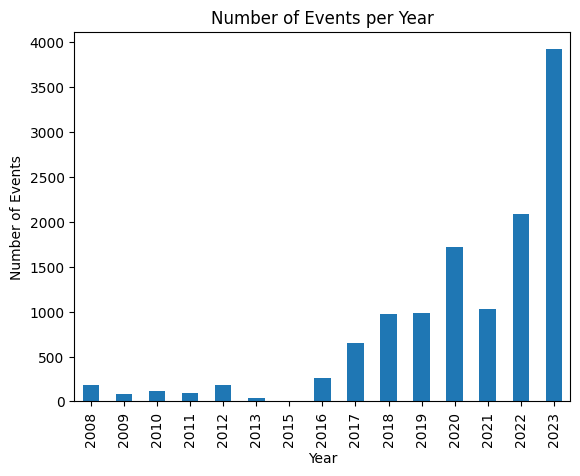

In [ ]:
#asked chatgpt to create a plot for me
import matplotlib.pyplot as plt

events_per_year = df['year'].value_counts().sort_index()
events_per_year.plot(kind='bar')
plt.title('Number of Events per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()
